In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data

In [2]:
class Deck():
    """ Create a deck class """
    
    suits = ["C", "D", "H", "S"]
    values = [2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K", "A"] 
    def __init__(self, number=1, suits=suits, values=values):
        self.num_decks = number
        # We don't need the suits for blackjack
        self.deck = [i for i in values for j in suits for k in range(number)]
        
    def shuffle_deck(self):
        np.random.shuffle(self.deck)
        
    def deal(self):
        return self.deck.pop(0)

In [3]:
test_deck = Deck(2)
test_deck.deck[:5]

[2, 2, 2, 2, 2]

In [4]:
test_deck.shuffle_deck()
test_deck.deck[:5]

[9, 'K', 'Q', 2, 'A']

In [5]:
test_deck.deal()

9

In [6]:
test_deck.deck[:5]

['K', 'Q', 2, 'A', 4]

In [7]:
class play_blackjack():
    """ Play a game of blackjack with just the dealer and one player """
    def __init__(self):
        self.deck = Deck(8)
        
    def play(self):
        self.deck.shuffle_deck()
        self.dealer_hand = []
        self.player_hand = []
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        self.dealer_hand.append(self.deck.deck.pop(0))
        self.player_hand.append(self.deck.deck.pop(0))
        
    def hit(self, hand):
        hand.append(self.deck.deck.pop(0))

In [8]:
game = play_blackjack()
game.play()

In [9]:
game.dealer_hand

['K', 9]

In [10]:
game.player_hand

['A', 4]

In [11]:
game.hit(game.player_hand)
game.player_hand

['A', 4, 8]

In [12]:
def get_points(hand):
    
    # We want to track how the Ace was counted, if any
    # Whether it was a 1 or 11
    # So we want a tuple of (points, Ace_value)
    points = (0, 0)
    
    # replicate the original list
    cards = [i for i in hand]
    
    # If there's an Ace in the hand, take it out first
    # And count how many Aces there are
    has_A = 0
    while "A" in cards:
        has_A += 1
        cards.remove("A")
        
    # Get total points for all other cards
    try:
        if len(cards) > 0:
            for i in cards:
                try:
                    points = (points[0] + int(i), 0)
                except:
                    points = (points[0] + 10, 0)
    except:
        print (cards)
        print (type(cards))
    # Deal with the Ace if there was at least one
    
    for i in range(has_A):
        if type(points) == tuple:
            if points[0] + 11 <= 21:
                points = [(points[0] + 11, 11), (points[0] + 1, 1)]
            else:
                points = [(points[0] + 1, 1)]
        else:
            new_points = []
            for j in points:
                if j[0] + 11 <= 21:
                    new_points.extend([(j[0] + 11, 11), (j[0] + 1, 1)])
                else:
                    new_points.extend([(j[0] + 1, 1)])
            points = new_points
    
    # Now, points could be a list of tuples or a tuple
    if type(points) == list:
        # Sort the list by number of points in descending order
        points.sort(reverse=True)
        new_points = [i for i in points if i[0] <= 21]
        
        try:
            if len(new_points) == 0:
                # if there are no items in new_points
                # return the smallest item
                return points[-1]
            else:
                return new_points[0]
        except:
            print (new_points)
            print (type(new_points))
    else:
        return points # What we get back is a tuple (points, ace_value)

In [13]:
get_points(["A", "K", 9, 9])

(29, 1)

In [14]:
get_points(["A", "K"])

(21, 11)

In [15]:
get_points(["A", 9])

(20, 11)

In [16]:
get_points(["A", 6])

(17, 11)

In [17]:
def simulate_game(strategy="random"):
    game = play_blackjack()
    game.play()
    dealer_open, dealer_closed = game.dealer_hand
    player_card_one, player_card_two = game.player_hand
    dealer_original = get_points(game.dealer_hand)[0]
    player_original = get_points(game.player_hand)[0]
    
    dealer_hit = 0
    # Check if the dealer needs to hit
    dealer = game.dealer_hand
    # Dealer hits below 17
    while get_points(dealer)[0] < 17:
        game.hit(dealer)
        dealer_hit += 1
    
    # Change dealer_open to numerical
    if dealer_open in ["J", "Q", "K"]:
        dealer_open = 10
    elif dealer_open == "A":
        dealer_open = get_points(dealer)[1]
    
    player_hit = 0
    player = game.player_hand
        
    if strategy == "random":
        # Randomize it for the player to some extent
        while get_points(player)[0] < 11:
            game.hit(player)
            player_hit += 1
        while get_points(player)[0] < 20:
            if np.random.random() <= 0.5:
                game.hit(player)
                player_hit += 1
            else:
                break
    elif strategy == "recommended":
        # From lasvegas-how-to.com
        # Stand on a hand of 17 or more 
        # Never hit on 12, 13, 14, 15 or 16 when the dealer is showing 16 or less
        # Always split 8's
        # Double down on 11 if dealer is showing 17 or less
        if dealer_open < 7:
#             print (get_points(player)[0])
            while get_points(player)[0] < 12:
                game.hit(player)
#                 print (player)
                player_hit += 1
        else:
            while get_points(player)[0] < 17:
                game.hit(player)
                player_hit += 1
        
    # If dealer is at 17, check if it's a soft 17
    # if yes, hit

    if get_points(dealer)[0] <= 17 and get_points(dealer)[1] == 11:
        game.hit(dealer)
        dealer_hit += 1
    
    dealer_final = get_points(dealer)[0]
    player_final = get_points(player)[0]
    
    dealer_busts = dealer_final > 21
    player_busts = player_final > 21
    
    
    player_wins = 1
    
    if player_busts:
        player_wins = 0
    elif dealer_busts:
        player_wins = 1
    elif player_final >= dealer_final:
        player_wins = 1
    
    return [dealer_open, dealer_closed, dealer_original, dealer_hit, dealer_final, int(dealer_busts), dealer,
            player_card_one, player_card_two, player_original, player_hit, player_final, int(player_busts), 
            int(player_wins), player, strategy]

In [18]:
simulate_game()

[10, 7, 17, 0, 17, 0, ['J', 7], 3, 2, 5, 2, 18, 0, 1, [3, 2, 3, 'Q'], 'random']

In [19]:
ran_strat = [simulate_game() for _ in range(50000)]

In [20]:
rec_strat = [simulate_game(strategy="recommended") for _ in range(50000)]

In [21]:
data = []
data.extend(ran_strat)
data.extend(rec_strat)
# data[:5]

In [22]:
df = pd.DataFrame(data, columns=["dealer_open", "dealer_closed", 
                               "dealer_original", "dealer_hit", 
                               "dealer_final", "dealer_busts", 
                                 "dealer_hand",
                               "player_card_one", "player_card_two", 
                               "player_original", "player_hit", 
                               "player_final", "player_busts", 
                               "player_wins", "player_hand", "strategy"])

In [23]:
old_data = pd.read_csv("blackjack.csv")
df = pd.concat([old_data, df])

In [24]:
# Save so we can add to it next time
df.to_csv("blackjack.csv", index=False)

In [25]:
df.shape

(400000, 16)

In [26]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,dealer_hand,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_wins,player_hand,strategy
0,6,4,10,2,18,0,"[6, 4, 2, 6]",4,8,12,1,22,1,0,"[4, 8, 10]",random
1,10,5,15,1,22,1,"[10, 5, 7]",Q,6,16,0,16,0,1,"['Q', 6]",random
2,11,Q,21,0,21,0,"['A', 'Q']",A,A,12,0,12,0,1,"['A', 'A']",random
3,11,5,16,2,20,0,"['A', 5, 'A', 3]",10,8,18,0,18,0,1,"[10, 8]",random
4,7,6,13,1,21,0,"[7, 6, 8]",3,8,11,3,20,0,1,"[3, 8, 3, 4, 2]",random


# Analyze data

In [27]:
df = pd.read_csv("blackjack.csv")

In [28]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,dealer_hand,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_wins,player_hand,strategy
0,6,4,10,2,18,0,"[6, 4, 2, 6]",4,8,12,1,22,1,0,"[4, 8, 10]",random
1,10,5,15,1,22,1,"[10, 5, 7]",Q,6,16,0,16,0,1,"['Q', 6]",random
2,11,Q,21,0,21,0,"['A', 'Q']",A,A,12,0,12,0,1,"['A', 'A']",random
3,11,5,16,2,20,0,"['A', 5, 'A', 3]",10,8,18,0,18,0,1,"[10, 8]",random
4,7,6,13,1,21,0,"[7, 6, 8]",3,8,11,3,20,0,1,"[3, 8, 3, 4, 2]",random


## Comparing strategies

In [29]:
# Define a function to generate proportion of wins on random and recommended strategy
# Return as list [proportion of wins on random, proportion of wins on recommended]
def get_wins(num=100):
    return [sum([simulate_game(strategy="random")[-3] for _ in range(num)])/num, 
            sum([simulate_game(strategy="recommended")[-3] for _ in range(num)])/num]

In [30]:
player_wins_df = pd.DataFrame([get_wins() for _ in range(5000)], columns=["random", "recommended"])

In [31]:
old_player_data = pd.read_csv("player_wins.csv")
player_wins_df = pd.concat([old_player_data, player_wins_df])

In [32]:
# Save so we can add to it next time
player_wins_df.to_csv("player_wins.csv", index=False)

In [33]:
player_wins_df.shape

(10000, 2)

In [34]:
player_wins_df.describe()

,random,recommended
count,10000.000000,10000.000000
mean,0.760738,0.831543
std,0.042559,0.037868
min,0.610000,0.680000
25%,0.730000,0.810000
50%,0.760000,0.830000
75%,0.790000,0.860000
max,0.910000,0.940000


Notes: Our mean number of wins moves up by about 5% when moving from random to recommended strategy.

/Users/joce/anaconda2/envs/Python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


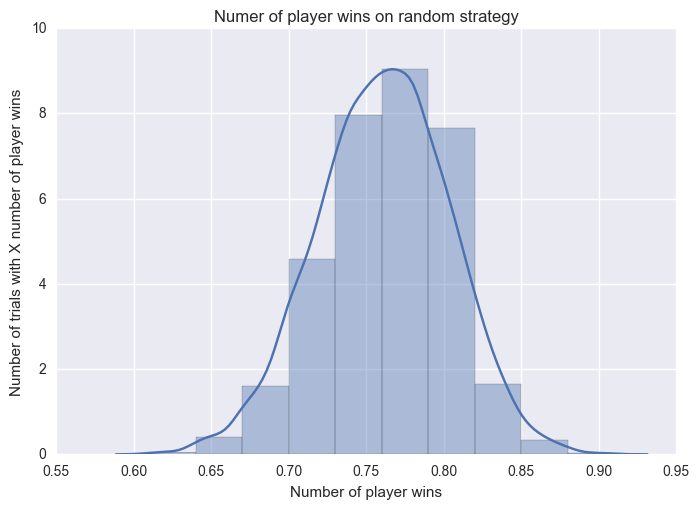

In [38]:
sns.distplot(player_wins_df["random"], bins=10);
plt.xlabel("Number of player wins");
plt.ylabel("Number of trials with X number of player wins");
plt.title("Numer of player wins on random strategy");
plt.show();

/Users/joce/anaconda2/envs/Python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


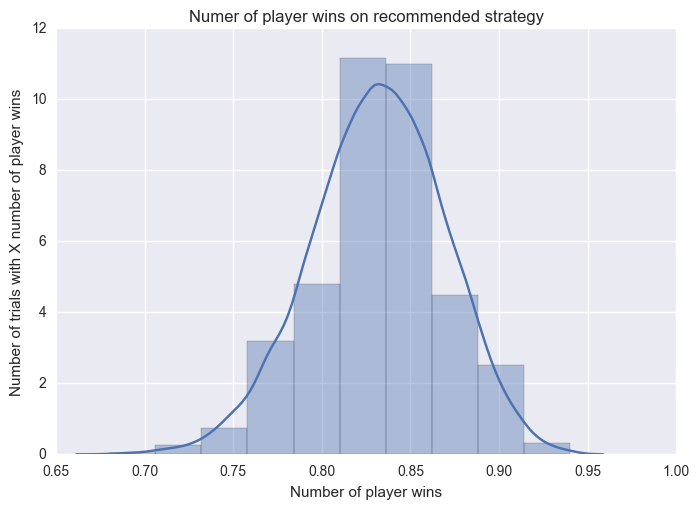

In [39]:
sns.distplot(player_wins_df["recommended"], bins=10);
plt.xlabel("Number of player wins");
plt.ylabel("Number of trials with X number of player wins");
plt.title("Numer of player wins on recommended strategy");
plt.show();

In [25]:
player_hands = pd.pivot_table(df, index=["player_card_one", "player_card_two", "player_original"], 
                              values=["player_busts", "player_wins"], aggfunc=[len, sum])
player_hands.reset_index(inplace=True)
player_hands.columns = player_hands.columns.values
del player_hands[('len', 'player_wins')]
player_hands.columns = ["player_card_one", "player_card_two", "player_original", "total", "player_busts", "player_wins"]
player_hands.head()

,player_card_one,player_card_two,player_original,total,player_busts,player_wins
0,10,10,20,3344,767,2038
1,10,2,12,3593,911,1307
2,10,3,13,3470,1009,1265
3,10,4,14,3527,1073,1231
4,10,5,15,3622,1214,1254


## Dealer

In [212]:
dealer_hands = pd.pivot_table(df, index=["dealer_open", "strategy"], 
                              values=["dealer_busts", "player_wins"], aggfunc=[len, sum])
dealer_hands.reset_index(inplace=True)
dealer_hands.columns = dealer_hands.columns.values
del dealer_hands[('len', 'player_wins')]
dealer_hands.columns = ["dealer_open", "strategy","total", "dealer_busts", "player_wins"]
dealer_hands.head()

,dealer_open,strategy,total,dealer_busts,player_wins
0,1,random,3292,1985,2470
1,1,recommended,3282,2013,3282
2,2,random,15358,5541,11750
3,2,recommended,15429,5726,15429
4,3,random,15440,6104,11749


We only get to see the dealer's open card, so that's the only one we care about.

In [213]:
dealer_open_hand = dealer_hands.copy()
dealer_open_hand["percent_dealer_busts"] = dealer_open_hand["dealer_busts"] / dealer_open_hand["total"]
dealer_open_hand["percent_player_wins"] = dealer_open_hand["player_wins"] / dealer_open_hand["total"]
dealer_open_hand

,dealer_open,strategy,total,dealer_busts,player_wins,percent_dealer_busts,percent_player_wins
0,1,random,3292,1985,2470,0.602977,0.750304
1,1,recommended,3282,2013,3282,0.613346,1.000000
2,2,random,15358,5541,11750,0.360789,0.765074
3,2,recommended,15429,5726,15429,0.371119,1.000000
4,3,random,15440,6104,11749,0.395337,0.760946
5,3,recommended,15325,5902,15325,0.385122,1.000000
6,4,random,15041,6136,11445,0.407952,0.760920
7,4,recommended,15390,6297,15390,0.409162,1.000000
8,5,random,15357,6676,11844,0.434720,0.771244
9,5,recommended,15360,6571,15360,0.427799,1.000000


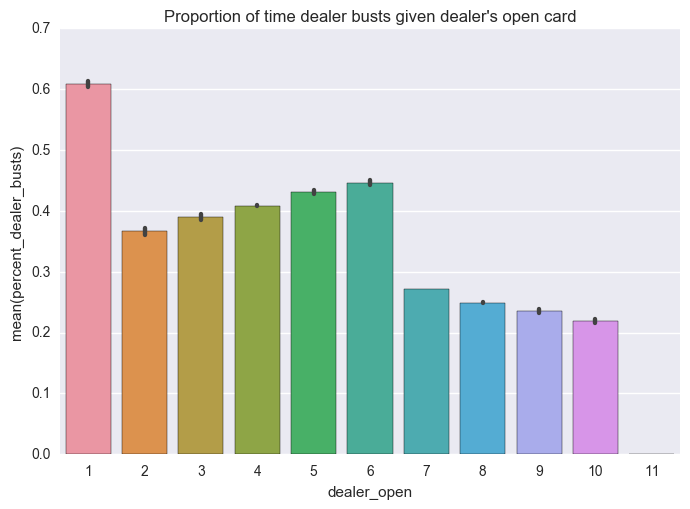

In [214]:
sns.barplot(x="dealer_open", y="percent_dealer_busts", data=dealer_open_hand);
plt.title("Proportion of time dealer busts given dealer's open card");
plt.show();

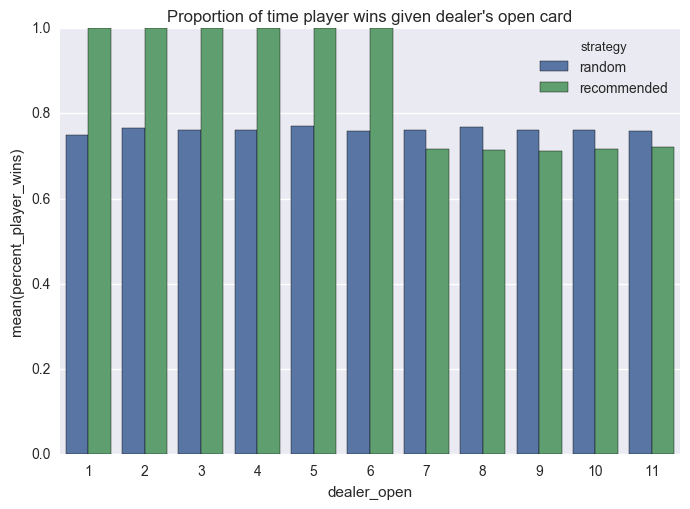

In [215]:
sns.barplot(x="dealer_open", y="percent_player_wins", hue="strategy", data=dealer_open_hand);
plt.title("Proportion of time player wins given dealer's open card");
plt.show();

In [216]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_wins,strategy
0,4,J,14,1,23,1,7,J,17,1,23,1,0,random
1,3,4,7,2,19,0,A,K,21,0,21,0,1,random
2,8,5,13,1,22,1,7,2,9,1,12,0,1,random
3,3,K,13,1,19,0,5,8,13,0,13,0,1,random
4,5,5,10,2,19,0,K,3,13,0,13,0,1,random


In [217]:
dealer_fin = pd.pivot_table(df, index=["dealer_open", "strategy"], values=["dealer_final", "player_wins"], aggfunc=[len, np.median, sum])
dealer_fin.reset_index(inplace=True)
dealer_fin.columns = dealer_fin.columns.values
del dealer_fin[("median", "player_wins")]
del dealer_fin[("sum", "dealer_final")]
del dealer_fin[("len", "dealer_final")]
dealer_fin.columns = ["dealer_open", "strategy", "total", "median_dealer_final", "sum_player_wins"]
dealer_fin["percent_player_wins"] = dealer_fin["sum_player_wins"] / dealer_fin["total"]
dealer_fin.head()

,dealer_open,strategy,total,median_dealer_final,sum_player_wins,percent_player_wins
0,1,random,3292,22,2470,0.750304
1,1,recommended,3282,22,3282,1.000000
2,2,random,15358,20,11750,0.765074
3,2,recommended,15429,20,15429,1.000000
4,3,random,15440,21,11749,0.760946


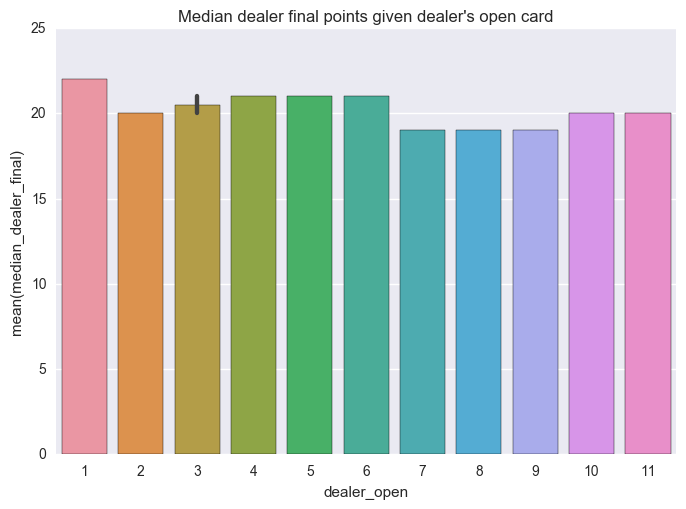

In [218]:
sns.barplot(x="dealer_open", y="median_dealer_final", data=dealer_fin);
plt.title("Median dealer final points given dealer's open card");
plt.show();

In [224]:
dealer_fin_p = pd.pivot_table(df, index=["dealer_final", "strategy"], values="player_wins", aggfunc=[len, sum]).reset_index()
dealer_fin_p.columns = ["dealer_final", "strategy","total", "player_wins_draws"]
dealer_fin_p["percent_player_wins_draws"] = dealer_fin_p["player_wins_draws"]/dealer_fin_p["total"]
dealer_fin_p

,dealer_final,strategy,total,player_wins_draws,percent_player_wins_draws
0,12,random,282,218,0.773050
1,12,recommended,308,264,0.857143
2,13,random,284,215,0.757042
3,13,recommended,309,269,0.870550
4,14,random,297,220,0.740741
5,14,recommended,308,271,0.879870
6,15,random,274,196,0.715328
7,15,recommended,273,229,0.838828
8,16,random,273,216,0.791209
9,16,recommended,292,253,0.866438


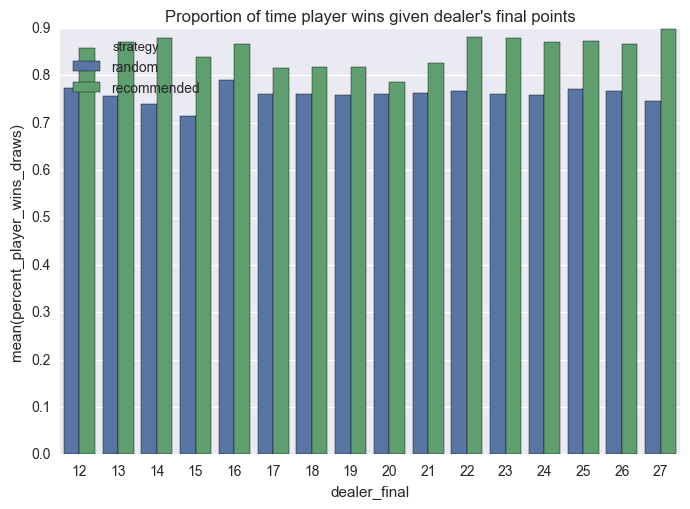

In [225]:
sns.barplot(x="dealer_final", y="percent_player_wins_draws", hue="strategy", data=dealer_fin_p);
plt.title("Proportion of time player wins given dealer's final points");
plt.show();